# Captum Visual Insights for MNIST Classification Model

This Notebook helps you to get started with the Captum Insights..The example covered here is from the MNIST Classifier model used in Torchserve.In order to understand the word importances and attributions when we make an Explanation Request, we use Captum Insights

In [1]:
import json
import captum
from captum.attr import visualization as viz
import os
import logging
import numpy as np
import json
import torch
from transformers import AutoTokenizer
from PIL import Image
from torchvision.transforms import ToTensor
from matplotlib.colors import LinearSegmentedColormap

Create the mar file for the MNIST Classification model and place the artefacts from where you can serve the model. 


In [2]:
!torch-model-archiver --model-name mnist_explain --version 1.0 --model-file serve/examples/image_classifier/mnist/mnist.py --serialized-file serve/examples/image_classifier/mnist/mnist_cnn.pt --handler  serve/examples/image_classifier/mnist/mnist_handler.py

/bin/sh: 1: torch-model-archiver: not found


In [3]:
#curl request to make a Prediction Request
!curl -H "Content-Type: application/json" --data @examples/image_classifier/mnist/mnist_ts.json http://127.0.0.1:8080/predictions/mnist_explain

2

Make a Explanation response for the bert model by specifying body in the service envelope in the config.properties file, like below:

```
service_envelope=body
```

When a json file is passed as a request format to the curl, Torchserve unwraps the json file from the request body. This is the reason for specifying service_envelope=body in the config.properties file

In [4]:
#curl command to make an Explanation Request and the response is as below:
#mnis_ts.json file contains the input for the inference request
!curl -H "Content-Type: application/json" --data @examples/image_classifier/mnist/mnist_ts.json http://127.0.0.1:8080/explanations/mnist_explain

[
  [
    [
      0.004570948731989492,
      0.006216969640322402,
      0.008197565423679522,
      0.009563574612830427,
      0.008999274832810742,
      0.009673474804303854,
      0.007599905146155397,
      0.00636138087221357,
      0.005768828729217899,
      0.004394465747976554,
      0.004948218056579564,
      0.005273460629510146,
      0.005523799690682735,
      0.007789356618988726,
      0.008759363533045739,
      0.004304805440696481,
      0.010970579124389682,
      0.0032484391676092287,
      0.005998033079490753,
      0.003754366000510472,
      0.002765290919421939,
      0.0043140862178245466,
      0.001400857504198272,
      0.004841846660876866,
      0.0006374841493763042,
      0.001855854010034871,
      -0.0008280458282478836,
      -0.0
    ],
    [
      0.00166251588071497,
      0.0044437916933807,
      0.012387840712028125,
      0.009450844412298704,
      0.016143820999121934,
      0.007797502488838184,
      0.01394224080820749,
      0.0075

The above explanation response is present in the mnist_response.json file. From the MNIST_Response.json file the attributions key-value pair is loaded

In [5]:
input_file=open('./mnist_response.json', 'r')
input_json = json.load(input_file)
attributions = input_json['explanations']

In [6]:
img_path="./examples/image_classifier/mnist/test_data/2.png"
inp_image = Image.open(img_path)
inp_image = ToTensor()(inp_image).unsqueeze(0)

For the captum visual insights, we need to pass the Input Image and the Attributions as arguments. The input type should be in the form of a numpy array for both these arguments, since the visualize_image_attr method only support numpy array data type.

In [7]:
attributions = np.array(attributions)
inp_image = np.array(inp_image)

In [8]:
#Printing the shape of attributions and inp_image
print("Attributions Shape :", attributions.shape)
print("Input Image Shape :", inp_image.shape)

Attributions Shape : (1, 1, 28, 28)
Input Image Shape : (1, 1, 28, 28)


Reorient the shape to render the visualization

In [9]:
inp_image = inp_image.reshape((28,28,1))
attributions = attributions.reshape((28,28,1))

Displaying the Original Image to show the changes with captum insights

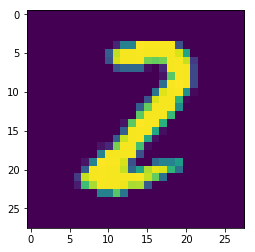

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./examples/image_classifier/mnist/test_data/2.png')
imgplot = plt.imshow(img)
plt.show()

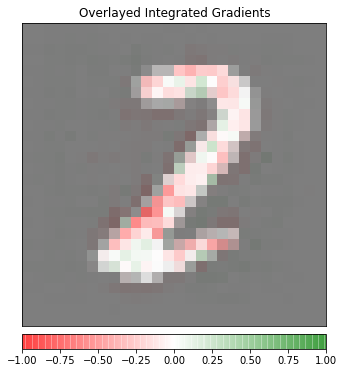

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f29c634bd30>)

In [11]:
viz.visualize_image_attr(attributions,
                             inp_image,method="blended_heat_map",sign="all",
                          show_colorbar=True, title="Overlayed Integrated Gradients")